<a href="https://colab.research.google.com/github/sumico2019/ps/blob/main/WeatherAPI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests
import json
from pprint import pprint

# 5日間（3時間ごと）の天気を取得する：東京
url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP", key="0c2adddbc1f320c0d13388f6a289e5d3")

jsondata = requests.get(url).json()
pprint(jsondata)

{'city': {'coord': {'lat': 35.6895, 'lon': 139.6917},
          'country': 'JP',
          'id': 1850144,
          'name': '東京都',
          'population': 12445327,
          'sunrise': 1644183409,
          'sunset': 1644221634,
          'timezone': 32400},
 'cnt': 40,
 'cod': '200',
 'list': [{'clouds': {'all': 20},
           'dt': 1644202800,
           'dt_txt': '2022-02-07 03:00:00',
           'main': {'feels_like': 4.8,
                    'grnd_level': 1016,
                    'humidity': 27,
                    'pressure': 1022,
                    'sea_level': 1022,
                    'temp': 6.27,
                    'temp_kf': 0.34,
                    'temp_max': 6.27,
                    'temp_min': 5.93},
           'pop': 0,
           'sys': {'pod': 'd'},
           'visibility': 10000,
           'weather': [{'description': '薄い雲',
                        'icon': '02d',
                        'id': 801,
                        'main': 'Clouds'}],
           'wind'

In [ ]:
from datetime import datetime, timedelta, timezone
# datetimeモジュールは日時を操作するためのクラスを提供

# UTC（協定世界時）をJST（日本標準時）に変換
timestamp = 1562889600

tz = timezone(timedelta(), 'UTC')
utc = datetime.fromtimestamp(timestamp, tz)
# 引数はtzかNone　指定しない場合ローカルの日時に返される
print(utc)

tz = timezone(timedelta(hours=+9), 'JST')
jst = datetime.fromtimestamp(timestamp, tz)
print(jst)
print(str(jst)[:-9])

2019-07-12 00:00:00+00:00
2019-07-12 09:00:00+09:00
2019-07-12 09:00


In [ ]:
import requests
import json
from datetime import datetime, timedelta, timezone

# 5日間（3時間ごと）の天気を取得する：東京
url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP", key="0c2adddbc1f320c0d13388f6a289e5d3")

jsondata = requests.get(url).json()
tz = timezone(timedelta(hours=+9), 'JST')
for dat in jsondata["list"]:
	jst = str(datetime.fromtimestamp(dat["dt"], tz))[:-9]
	print("UST={ust}, JST={jst}".format(ust=dat["dt_txt"], jst=jst))

UST=2022-02-07 03:00:00, JST=2022-02-07 12:00
UST=2022-02-07 06:00:00, JST=2022-02-07 15:00
UST=2022-02-07 09:00:00, JST=2022-02-07 18:00
UST=2022-02-07 12:00:00, JST=2022-02-07 21:00
UST=2022-02-07 15:00:00, JST=2022-02-08 00:00
UST=2022-02-07 18:00:00, JST=2022-02-08 03:00
UST=2022-02-07 21:00:00, JST=2022-02-08 06:00
UST=2022-02-08 00:00:00, JST=2022-02-08 09:00
UST=2022-02-08 03:00:00, JST=2022-02-08 12:00
UST=2022-02-08 06:00:00, JST=2022-02-08 15:00
UST=2022-02-08 09:00:00, JST=2022-02-08 18:00
UST=2022-02-08 12:00:00, JST=2022-02-08 21:00
UST=2022-02-08 15:00:00, JST=2022-02-09 00:00
UST=2022-02-08 18:00:00, JST=2022-02-09 03:00
UST=2022-02-08 21:00:00, JST=2022-02-09 06:00
UST=2022-02-09 00:00:00, JST=2022-02-09 09:00
UST=2022-02-09 03:00:00, JST=2022-02-09 12:00
UST=2022-02-09 06:00:00, JST=2022-02-09 15:00
UST=2022-02-09 09:00:00, JST=2022-02-09 18:00
UST=2022-02-09 12:00:00, JST=2022-02-09 21:00
UST=2022-02-09 15:00:00, JST=2022-02-10 00:00
UST=2022-02-09 18:00:00, JST=2022-

In [ ]:
import requests
import json
from datetime import datetime, timedelta, timezone

# 5日間（3時間ごと）の天気を取得する：東京
url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP", key="0c2adddbc1f320c0d13388f6a289e5d3")

jsondata = requests.get(url).json()
tz = timezone(timedelta(hours=+9), 'JST')
for dat in jsondata["list"]:
	jst = str(datetime.fromtimestamp(dat["dt"], tz))[:-9]
	weather = dat["weather"][0]["description"]
	temp = dat["main"]["temp"]
	print("日時:{jst}, 天気:{w}, 気温:{t}度".format(jst=jst, w=weather, t=temp))

日時:2022-02-07 12:00, 天気:薄い雲, 気温:6.17度
日時:2022-02-07 15:00, 天気:薄い雲, 気温:6.44度
日時:2022-02-07 18:00, 天気:薄い雲, 気温:6.64度
日時:2022-02-07 21:00, 天気:雲, 気温:6度
日時:2022-02-08 00:00, 天気:曇りがち, 気温:4.2度
日時:2022-02-08 03:00, 天気:厚い雲, 気温:3.46度
日時:2022-02-08 06:00, 天気:厚い雲, 気温:3.33度
日時:2022-02-08 09:00, 天気:厚い雲, 気温:4.2度
日時:2022-02-08 12:00, 天気:厚い雲, 気温:6.36度
日時:2022-02-08 15:00, 天気:曇りがち, 気温:7.66度
日時:2022-02-08 18:00, 天気:晴天, 気温:7.47度
日時:2022-02-08 21:00, 天気:薄い雲, 気温:6.34度
日時:2022-02-09 00:00, 天気:晴天, 気温:5.29度
日時:2022-02-09 03:00, 天気:晴天, 気温:4.05度
日時:2022-02-09 06:00, 天気:曇りがち, 気温:3.36度
日時:2022-02-09 09:00, 天気:曇りがち, 気温:4.45度
日時:2022-02-09 12:00, 天気:曇りがち, 気温:6.86度
日時:2022-02-09 15:00, 天気:曇りがち, 気温:8.3度
日時:2022-02-09 18:00, 天気:厚い雲, 気温:8.55度
日時:2022-02-09 21:00, 天気:厚い雲, 気温:7.61度
日時:2022-02-10 00:00, 天気:小雨, 気温:6.2度
日時:2022-02-10 03:00, 天気:適度な雨, 気温:4.71度
日時:2022-02-10 06:00, 天気:適度な雨, 気温:3.41度
日時:2022-02-10 09:00, 天気:適度な雨, 気温:2.63度
日時:2022-02-10 12:00, 天気:適度な雨, 気温:2.45度
日時:2022-02-10 15:00, 天気:適度な雨, 気温:3.08度
日時:2022-02-10 

In [ ]:
import requests
import json
from pprint import pprint
from datetime import datetime, timedelta, timezone
import pandas as pd

# 5日間（3時間ごと）の天気を取得する：東京
url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP", key="0c2adddbc1f320c0d13388f6a289e5d3")

jsondata = requests.get(url).json()
df = pd.DataFrame(columns=["気温"])
tz = timezone(timedelta(hours=+9), 'JST')
for dat in jsondata["list"]:
	jst = str(datetime.fromtimestamp(dat["dt"], tz))[:-9]
	temp = dat["main"]["temp"]
	df.loc[jst] = temp

pprint(df)

                    気温
2022-02-07 12:00  6.17
2022-02-07 15:00  6.44
2022-02-07 18:00  6.64
2022-02-07 21:00  6.00
2022-02-08 00:00  4.20
2022-02-08 03:00  3.46
2022-02-08 06:00  3.33
2022-02-08 09:00  4.20
2022-02-08 12:00  6.36
2022-02-08 15:00  7.66
2022-02-08 18:00  7.47
2022-02-08 21:00  6.34
2022-02-09 00:00  5.29
2022-02-09 03:00  4.05
2022-02-09 06:00  3.36
2022-02-09 09:00  4.45
2022-02-09 12:00  6.86
2022-02-09 15:00  8.30
2022-02-09 18:00  8.55
2022-02-09 21:00  7.61
2022-02-10 00:00  6.20
2022-02-10 03:00  4.71
2022-02-10 06:00  3.41
2022-02-10 09:00  2.63
2022-02-10 12:00  2.45
2022-02-10 15:00  3.08
2022-02-10 18:00  2.89
2022-02-10 21:00  2.34
2022-02-11 00:00  2.57
2022-02-11 03:00  2.98
2022-02-11 06:00  3.03
2022-02-11 09:00  3.11
2022-02-11 12:00  7.13
2022-02-11 15:00  8.74
2022-02-11 18:00  8.13
2022-02-11 21:00  6.93
2022-02-12 00:00  5.81
2022-02-12 03:00  5.24
2022-02-12 06:00  4.64
2022-02-12 09:00  5.58


In [ ]:
!pip install japanize-matplotlib

     |████████████████████████████████| 4.1 MB 5.2 MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.1.3-py3-none-any.whl size=4120275 sha256=8d96325878efc823b46b99f46a8fce28804e5e30099c54911d375df1fa3b0ad0
  Stored in directory: /root/.cache/pip/wheels/83/97/6b/e9e0cde099cc40f972b8dd23367308f7705ae06cd6d4714658
Successfully built japanize-matplotlib


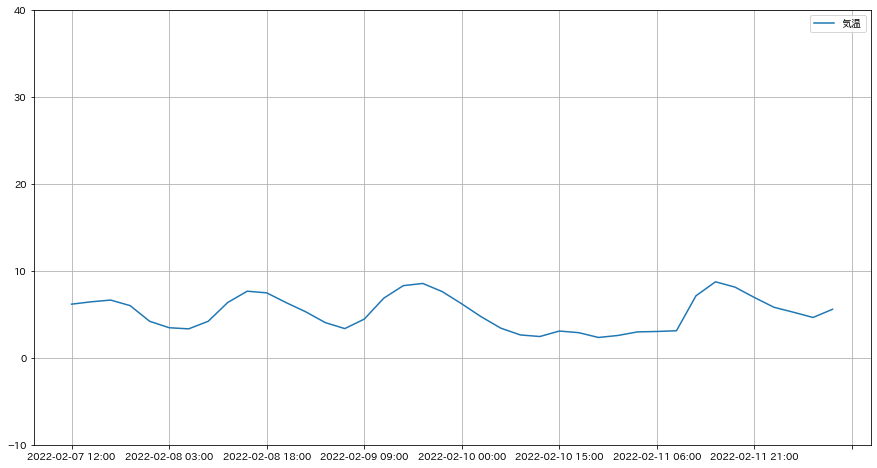

In [ ]:
import requests
import json
from pprint import pprint
from datetime import datetime, timedelta, timezone
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

# 5日間（3時間ごと）の天気を取得する：東京
url = "http://api.openweathermap.org/data/2.5/forecast?q={city}&appid={key}&lang=ja&units=metric"
url = url.format(city="Tokyo,JP", key="0c2adddbc1f320c0d13388f6a289e5d3")

jsondata = requests.get(url).json()
df = pd.DataFrame(columns=["気温"])
tz = timezone(timedelta(hours=+9), 'JST')
for dat in jsondata["list"]:
	jst = str(datetime.fromtimestamp(dat["dt"], tz))[:-9]
	temp = dat["main"]["temp"]
	df.loc[jst] = temp

df.plot(figsize=(15,8))
plt.ylim(-10,40)
plt.grid()
plt.show()